# Descriptive Statistics


This page provides a summary of demographic characteristics represented in the dataset and the undergraduate student population sampled.  

---

```{contents}
:depth: 4
```

---



In [10]:
install.packages("tidyverse")
install.packages("haven")
install.packages("plyr")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("stringr")
install.packages("labelled")
install.packages("lme4")
install.packages("readxl")

library(haven)     # SPSS/.sav file import
library(plyr)
library(dplyr)     # data manipulation
library(ggplot2)   # plotting;
library(stringr)   # string manipulation
library(labelled)
library(lme4)
library(readxl)


The downloaded binary packages are in
	/var/folders/k_/rtkc8hhs7p3dc5w9gt0zfpzh0000gn/T//RtmpxyLYbD/downloaded_packages

The downloaded binary packages are in
	/var/folders/k_/rtkc8hhs7p3dc5w9gt0zfpzh0000gn/T//RtmpxyLYbD/downloaded_packages

The downloaded binary packages are in
	/var/folders/k_/rtkc8hhs7p3dc5w9gt0zfpzh0000gn/T//RtmpxyLYbD/downloaded_packages

The downloaded binary packages are in
	/var/folders/k_/rtkc8hhs7p3dc5w9gt0zfpzh0000gn/T//RtmpxyLYbD/downloaded_packages

The downloaded binary packages are in
	/var/folders/k_/rtkc8hhs7p3dc5w9gt0zfpzh0000gn/T//RtmpxyLYbD/downloaded_packages

The downloaded binary packages are in
	/var/folders/k_/rtkc8hhs7p3dc5w9gt0zfpzh0000gn/T//RtmpxyLYbD/downloaded_packages

The downloaded binary packages are in
	/var/folders/k_/rtkc8hhs7p3dc5w9gt0zfpzh0000gn/T//RtmpxyLYbD/downloaded_packages

The downloaded binary packages are in
	/var/folders/k_/rtkc8hhs7p3dc5w9gt0zfpzh0000gn/T//RtmpxyLYbD/downloaded_packages

The downloaded binary packages 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix



In [11]:
#read the data
data <- read_sav('./data/ArtsEngagementMerged_V2_no_uniqname.sav')

In [12]:
dim(data)

[1] 4828 1876

In [13]:
#extract columns that contain the demographic data which were imported afterwards. e.g. sex,gpa...
data1<-data[,c(1865:1876)]

In [14]:
#extract columns that contain the demographic data in the original dataset.
data2<-data%>%select(parented,income,hstype,hssize,hslocation)

In [15]:
data3<-cbind(data1,data2)

In [16]:
data3<-data3[,-c(4,8,9,10,11,12)]

In [17]:
dim(data3)

[1] 4828   11

In [18]:
for(i in c(1:11)){
    data3[[i]]<- to_factor(data3[[i]])
    }

In [19]:
colnames(data3)[1] <- "Sex"
colnames(data3)[3] <- "Ethnicity"
colnames(data3)[4] <- "Major"
colnames(data3)[5] <- "School"

In [20]:
head(data3)

,Sex,ETHNIC_GROUP,Ethnicity,Major,School,CUM_GPA,parented,income,hstype,hssize,hslocation
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,Male,1,White,Social Theory and Practice BA,"Literature, Science & the Arts",3.63,Ph.D or professional degree,"More than $150,000",Traditional public,2001-3000,Suburban
2,Female,1,White,Spanish BS,"Literature, Science & the Arts",3.652,Master's,"$100,001-$150,000",Private religious,500-1000,Suburban
3,Male,1,White,Civil Engineering BSE,Engineering,3.946,Ph.D or professional degree,"$100,001-$150,000",Traditional public,500-1000,Rural
4,Female,6,Not Indic,Accounting MAcc,Ross School of Business,3.55,Master's,"More than $150,000",Traditional public,500-1000,Suburban
5,Female,3,Hispanic,Latin Amer & Caribbean St BA,"Literature, Science & the Arts",3.691,Ph.D or professional degree,"$50,000-$100,000",Traditional public,2001-3000,Suburban
6,Female,3,Hispanic,Psychology BA,"Literature, Science & the Arts",3.462,High school diploma or equivalent,"Less than $50,000",Traditional public,500-1000,Rural


In [34]:
install.packages("wesanderson")
library(wesanderson)
install.packages("viridis")
library(viridis)




The downloaded binary packages are in
	/var/folders/k_/rtkc8hhs7p3dc5w9gt0zfpzh0000gn/T//RtmpxyLYbD/downloaded_packages


also installing the dependency ‘gridExtra’





The downloaded binary packages are in
	/var/folders/k_/rtkc8hhs7p3dc5w9gt0zfpzh0000gn/T//RtmpxyLYbD/downloaded_packages


Loading required package: viridisLite



## Sex

,Sex,category,percentage
,<int>,<chr>,<dbl>
Female,3076,Female,0.637
Male,1370,Male,0.284
NA,382,NA,0.079


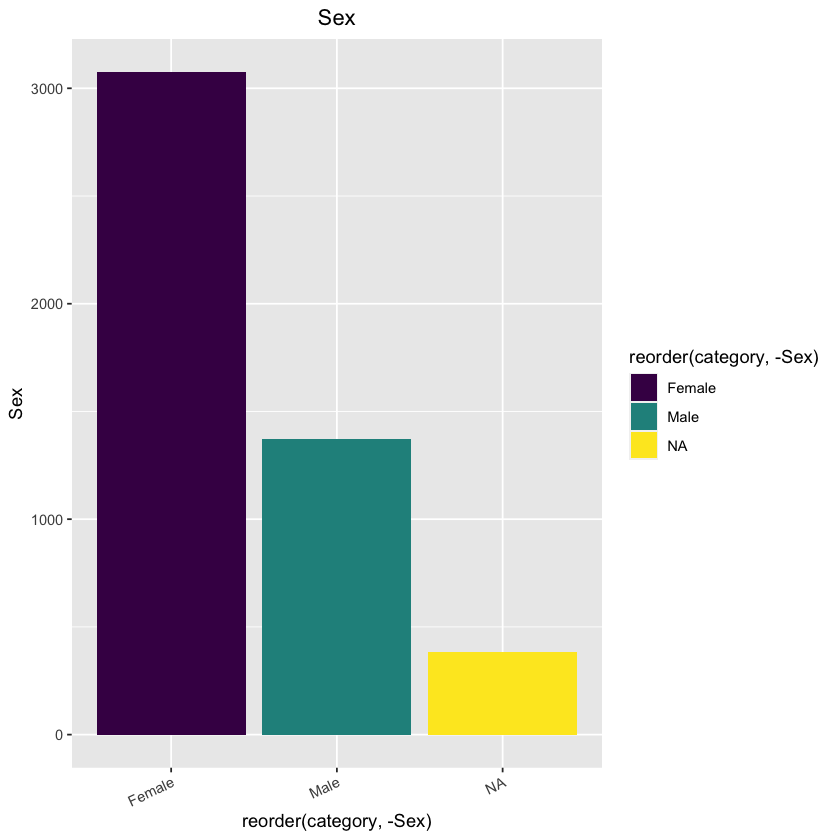

In [52]:
# Gender data
Sex<-data.frame(summary(data3$Sex))
Sex$category<-rownames(Sex)
colnames(Sex)[1] <- "Sex"
Sex<-Sex[order(Sex$Sex,decreasing = TRUE),] 
Sex$percentage<-round(Sex$Sex/4828,3)
# Show the dataframe
Sex
# plot and save the barplot
#pdf(file="Sex.pdf")
ggplot(Sex, aes(x=reorder(category,-Sex), y=Sex,fill = reorder(category,-Sex))) + 
geom_bar(stat = "identity") + 
labs(title = "Sex")+
theme(plot.title = element_text(hjust = 0.5))+
theme(axis.text.x = element_text(angle = 25, hjust = 1)) +
scale_fill_viridis(discrete = TRUE) 
#dev.off()


## Ethnicity

,Ethnicity,category,percentage
,<int>,<chr>,<dbl>
White,3023,White,0.626
Asian,722,Asian,0.150
NA,382,NA,0.079
Not Indic,243,Not Indic,0.050
Hispanic,168,Hispanic,0.035
2 or More,160,2 or More,0.033
Black,124,Black,0.026
Hawaiian,3,Hawaiian,0.001
Native Amr,3,Native Amr,0.001


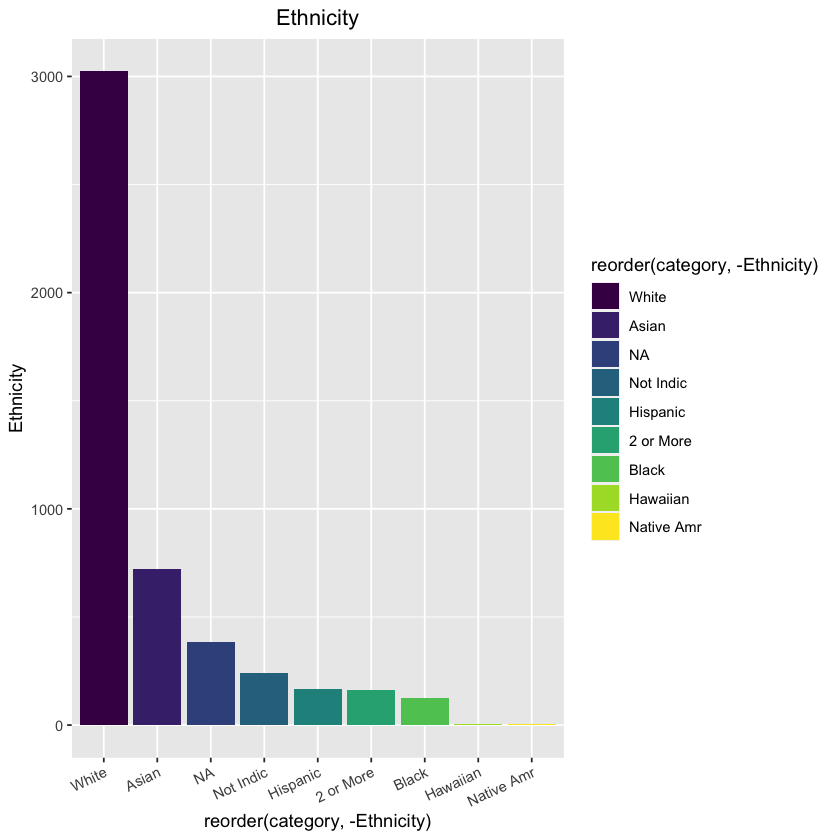

In [37]:
#Ethnicity data
Ethnicity<-data.frame(summary(data3$Ethnicity))
Ethnicity$category<-rownames(Ethnicity)
colnames(Ethnicity)[1] <- "Ethnicity"
Ethnicity<-Ethnicity[order(Ethnicity$Ethnicity,decreasing = TRUE),] 
Ethnicity$percentage<-round(Ethnicity$Ethnicity/4828,3)
# Show the dataframe
Ethnicity
# plot and save the barplot
#pdf(file="Ethnicity.pdf")
ggplot(Ethnicity, aes(x=reorder(category,-Ethnicity), y=Ethnicity,fill = reorder(category,-Ethnicity))) + 
geom_bar(stat = "identity") + 
labs(title = "Ethnicity")+
theme(plot.title = element_text(hjust = 0.5))+
theme(axis.text.x = element_text(angle = 25, hjust = 1)) +
scale_fill_viridis(discrete = TRUE) 

#dev.off()

## Course of Study / Major

,Major,category,percentage
,<int>,<chr>,<dbl>
NA,382,NA,0.079
(Other),343,(Other),0.071
Business Administration BBA,233,Business Administration BBA,0.048
Psychology BA,221,Psychology BA,0.046
Neuroscience BS,177,Neuroscience BS,0.037
Nursing BS Fresh,142,Nursing BS Fresh,0.029
English BA,141,English BA,0.029
Communication BA,134,Communication BA,0.028
Political Science BA,134,Political Science BA,0.028


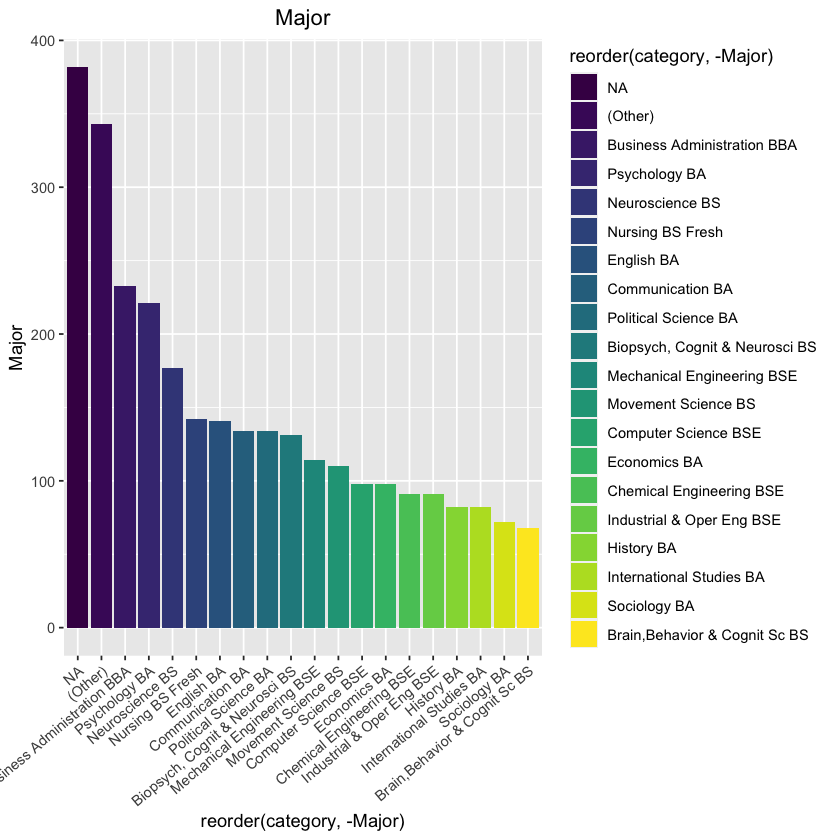

In [38]:
#Major data
Major<-data.frame(summary(data3$Major))
Major$category<-rownames(Major)
colnames(Major)[1] <- "Major"
Major<-Major[order(Major$Major,decreasing = TRUE),] 
Major$percentage<-round(Major$Major/4828,3)
Major[1:20,]
#pdf(file="Major.pdf")
ggplot(Major[1:20,], aes(x=reorder(category,-Major), y=Major,fill = reorder(category,-Major))) + 
geom_bar(stat = "identity") + 
labs(title = "Major")+
theme(plot.title = element_text(hjust = 0.5))+
theme(axis.text.x = element_text(angle = 40, hjust = 1)) +
scale_fill_viridis(discrete = TRUE) 
#dev.off()

## School 

,School,category,percentage
,<int>,<chr>,<dbl>
"Literature, Science & the Arts",2640,"Literature, Science & the Arts",0.547
Engineering,724,Engineering,0.150
NA,382,NA,0.079
Ross School of Business,261,Ross School of Business,0.054
Kinesiology,162,Kinesiology,0.034
Nursing,161,Nursing,0.033
"Music, Theatre & Dance",114,"Music, Theatre & Dance",0.024
Stamps School of Art & Design,88,Stamps School of Art & Design,0.018
Education,74,Education,0.015


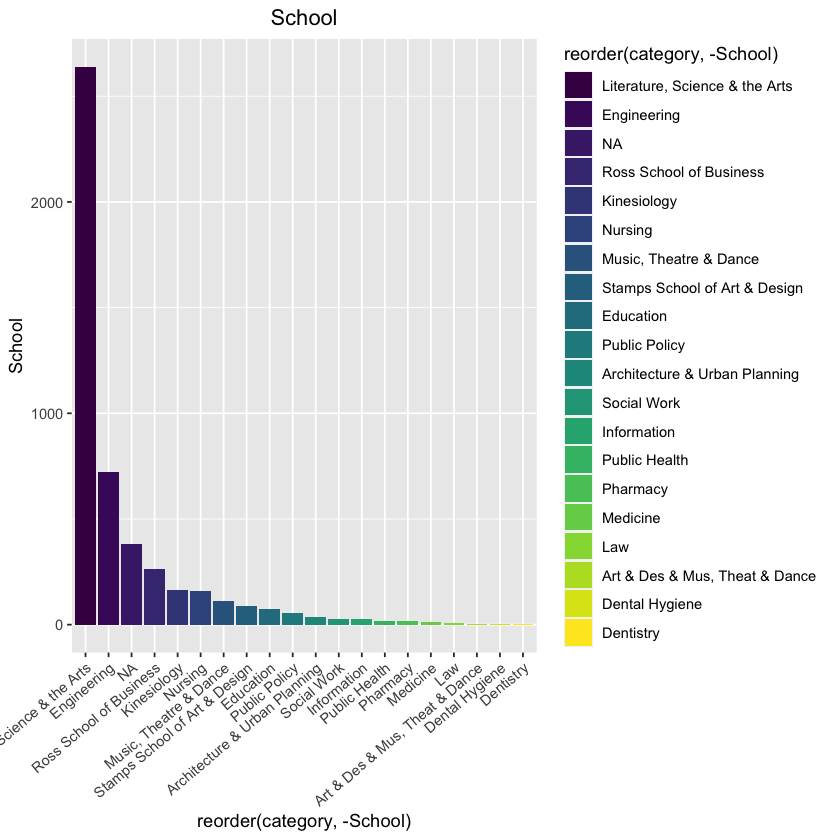

In [39]:
#School data
School<-data.frame(summary(data3$School))
School$category<-rownames(School)
colnames(School)[1] <- "School"
School<-School[order(School$School,decreasing = TRUE),] 
School$percentage<-round(School$School/4828,3)
School
#pdf(file="School.pdf")
ggplot(School[1:20,], aes(x=reorder(category,-School), y=School,fill = reorder(category,-School))) + 
geom_bar(stat = "identity") + 
labs(title = "School")+
theme(plot.title = element_text(hjust = 0.5))+
theme(axis.text.x = element_text(angle = 40, hjust = 1)) +
scale_fill_viridis(discrete = TRUE) 
#dev.off()

## Parents' Education Level

,parented,category,percentage
,<int>,<chr>,<dbl>
Master's,1439,Master's,0.298
Bachelor's,1279,Bachelor's,0.265
Ph.D or professional degree,1051,Ph.D or professional degree,0.218
High school diploma or equivalent,468,High school diploma or equivalent,0.097
NA's,286,NA's,0.059
Associate's,240,Associate's,0.050
Other,65,Other,0.013


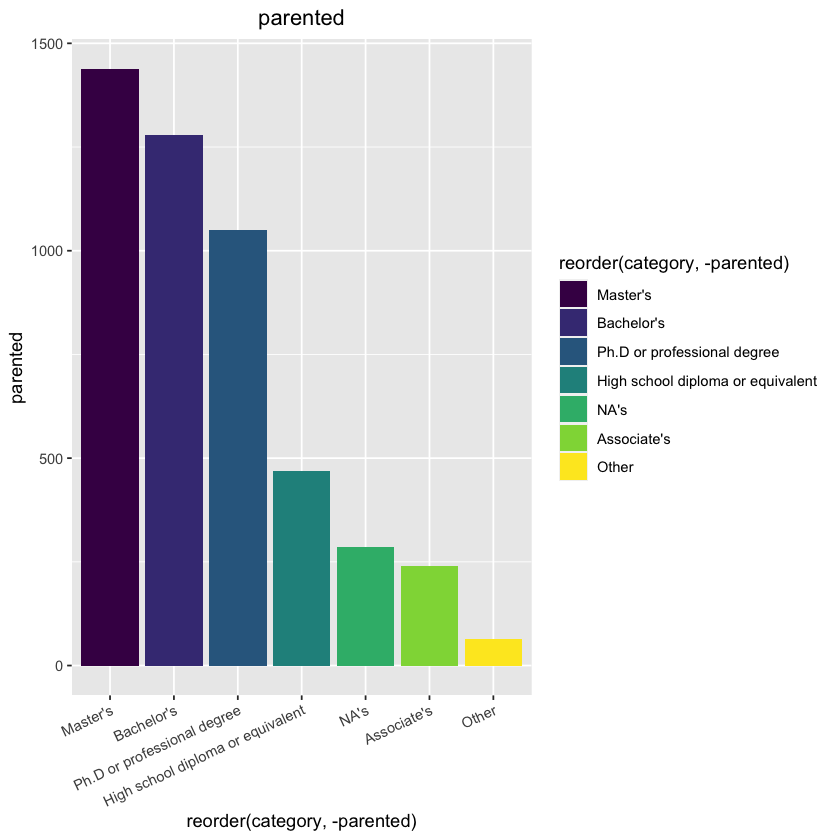

In [40]:
#parents eduation data
parented<-data.frame(summary(data3$parented))
parented$category<-rownames(parented)
colnames(parented)[1] <- "parented"
parented<-parented[order(parented$parented,decreasing = TRUE),] 
parented$percentage<-round(parented$parented/4828,3)
parented
#pdf(file="parented.pdf")
ggplot(parented, aes(x=reorder(category,-parented), y=parented,fill = reorder(category,-parented))) + 
geom_bar(stat = "identity") + 
labs(title = "parented")+
theme(plot.title = element_text(hjust = 0.5))+
theme(axis.text.x = element_text(angle = 25, hjust = 1)) +
scale_fill_viridis(discrete = TRUE) 
#dev.off()

## Family Income

,income,category,percentage
,<int>,<chr>,<dbl>
"$50,000-$100,000",1400,"$50,000-$100,000",0.290
"$100,001-$150,000",1271,"$100,001-$150,000",0.263
"More than $150,000",1178,"More than $150,000",0.244
"Less than $50,000",645,"Less than $50,000",0.134
NA's,334,NA's,0.069


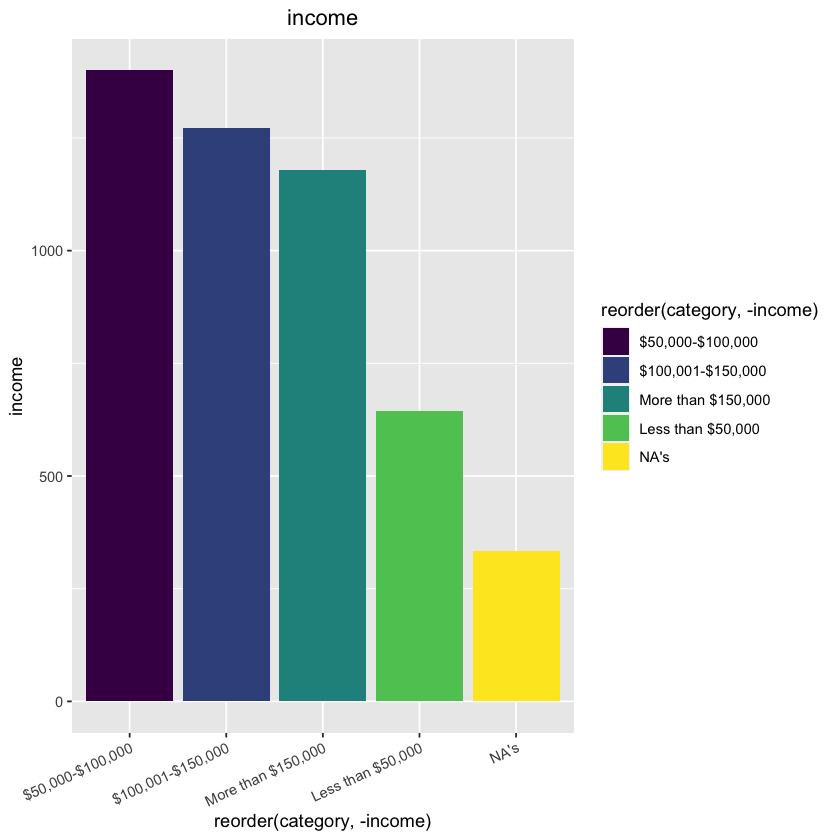

In [42]:
#family income data
income<-data.frame(summary(data3$income))
income$category<-rownames(income)
colnames(income)[1] <- "income"
income<-income[order(income$income,decreasing = TRUE),] 
income$percentage<-round(income$income/4828,3)
income
#pdf(file="income.pdf")
ggplot(income, aes(x=reorder(category,-income), y=income,fill = reorder(category,-income))) + 
geom_bar(stat = "identity") + 
labs(title = "income")+
theme(plot.title = element_text(hjust = 0.5))+
theme(axis.text.x = element_text(angle = 25, hjust = 1)) +
scale_fill_viridis(discrete = TRUE) 

#dev.off()

## High School Size

,hssize,category,percentage
,<int>,<chr>,<dbl>
1001-2000,1674,1001-2000,0.347
500-1000,1008,500-1000,0.209
Less than 500,856,Less than 500,0.177
2001-3000,765,2001-3000,0.158
NA's,289,NA's,0.060
More than 3001,236,More than 3001,0.049


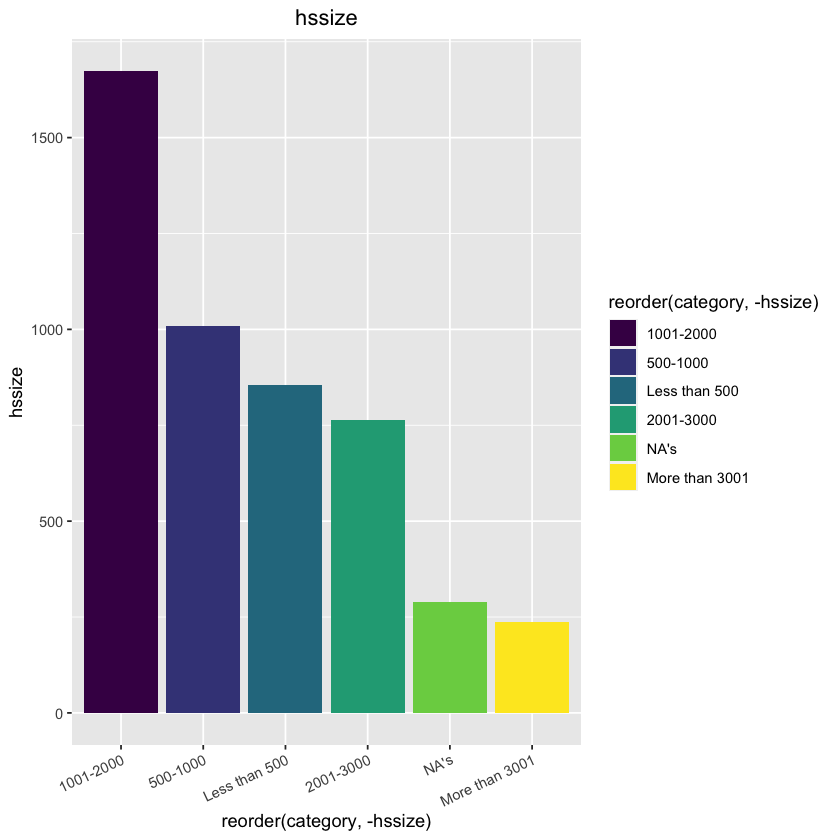

In [43]:
#high school size data
hssize<-data.frame(summary(data3$hssize))
hssize$category<-rownames(hssize)
colnames(hssize)[1] <- "hssize"
hssize<-hssize[order(hssize$hssize,decreasing = TRUE),] 
hssize$percentage<-round(hssize$hssize/4828,3)
hssize
#pdf(file="hssize.pdf")
ggplot(hssize, aes(x=reorder(category,-hssize), y=hssize,fill = reorder(category,-hssize))) + 
geom_bar(stat = "identity") + 
labs(title = "hssize")+
theme(plot.title = element_text(hjust = 0.5))+
theme(axis.text.x = element_text(angle = 25, hjust = 1)) +
scale_fill_viridis(discrete = TRUE) 
#dev.off()

## High School Type

,hstype,category,percentage
,<int>,<chr>,<dbl>
Traditional public,3428,Traditional public,0.710
Private religious,502,Private religious,0.104
NA's,287,NA's,0.059
Private non-religious,250,Private non-religious,0.052
Public magnet,228,Public magnet,0.047
Public charter,97,Public charter,0.020
Other,27,Other,0.006
Home school,9,Home school,0.002


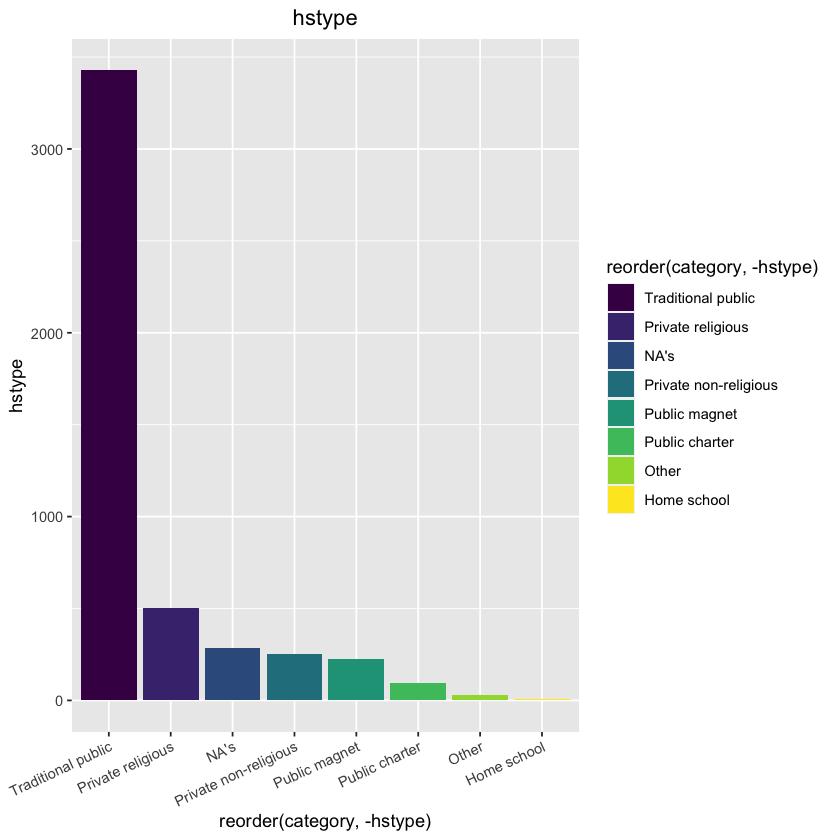

In [44]:
#high school type data
hstype<-data.frame(summary(data3$hstype))
hstype$category<-rownames(hstype)
colnames(hstype)[1] <- "hstype"
hstype<-hstype[order(hstype$hstype,decreasing = TRUE),] 
hstype$percentage<-round(hstype$hstype/4828,3)
hstype
#pdf(file="hstype.pdf")
ggplot(hstype, aes(x=reorder(category,-hstype), y=hstype,fill = reorder(category,-hstype))) + 
geom_bar(stat = "identity") + 
labs(title = "hstype")+
theme(plot.title = element_text(hjust = 0.5))+
theme(axis.text.x = element_text(angle = 25, hjust = 1)) +
scale_fill_viridis(discrete = TRUE) 
#dev.off()

## High School Location

,hslocation,category,percentage
,<int>,<chr>,<dbl>
Suburban,3258,Suburban,0.675
Urban,671,Urban,0.139
Rural,613,Rural,0.127
NA's,286,NA's,0.059


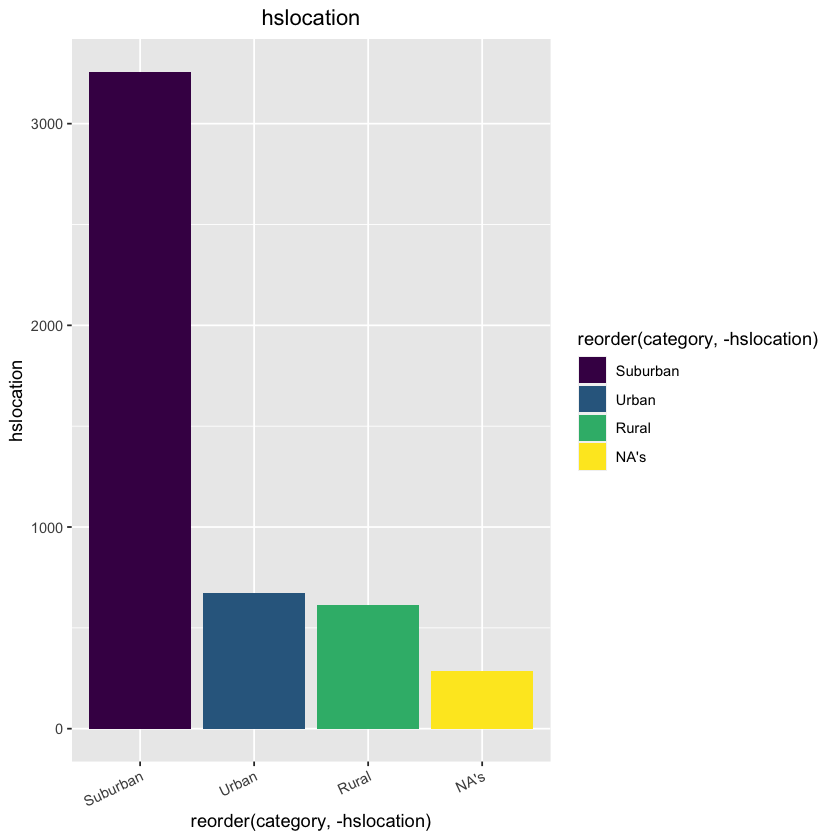

In [45]:
#high school location
hslocation<-data.frame(summary(data3$hslocation))
hslocation$category<-rownames(hslocation)
colnames(hslocation)[1] <- "hslocation"
hslocation<-hslocation[order(hslocation$hslocation,decreasing = TRUE),] 
hslocation$percentage<-round(hslocation$hslocation/4828,3)
hslocation
#pdf(file="hslocation.pdf")
ggplot(hslocation, aes(x=reorder(category,-hslocation), y=hslocation,fill = reorder(category,-hslocation))) + 
geom_bar(stat = "identity") + 
labs(title = "hslocation")+
theme(plot.title = element_text(hjust = 0.5))+
theme(axis.text.x = element_text(angle = 25, hjust = 1)) +
scale_fill_viridis(discrete = TRUE) 
#dev.off()

In [46]:
# gpa data
data4<-data3[which(!is.na(data3$CUM_GPA)),]
data4$CUM_GPA<-as.numeric(as.character(data4$CUM_GPA))
gpa<-summary(data4$CUM_GPA)


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [ ]:
## Grade Point Average

In [47]:
# The minimum gpa is 0. It is an outlier
gpa

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   3.234   3.512   3.437   3.731   4.301     382 

In [48]:
#remove 0 gpas
data5<-data4[which(data4$CUM_GPA!=0),]

In [49]:
summary(data5$CUM_GPA)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.008   3.237   3.514   3.451   3.732   4.301 

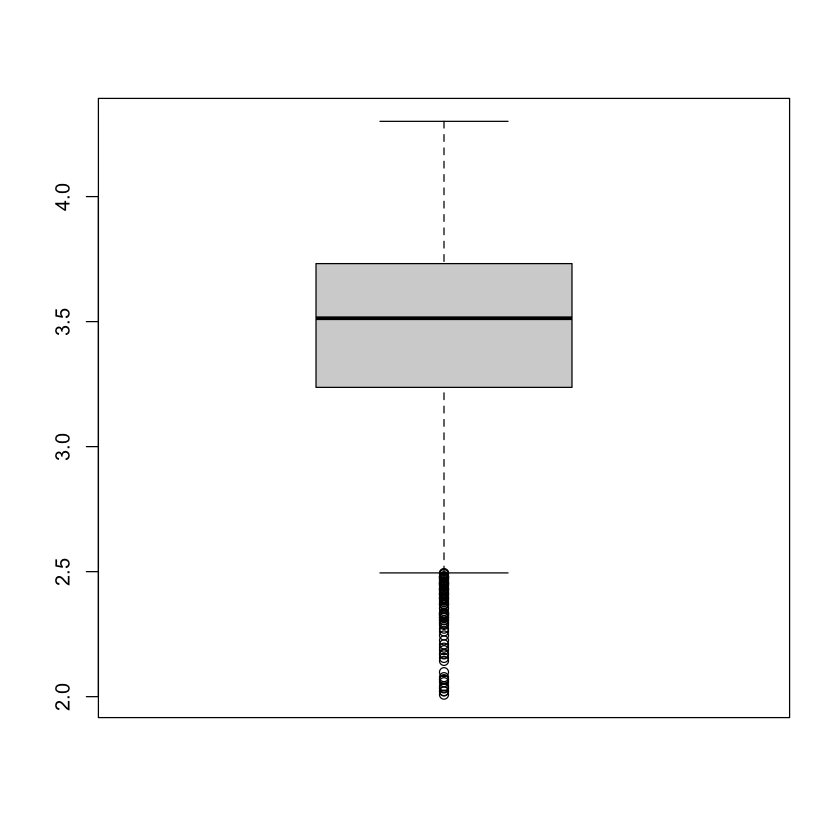

In [50]:
#save the boxplot
#pdf(file="gpa_boxplot.pdf")
boxplot(data5$CUM_GPA)
#dev.off()

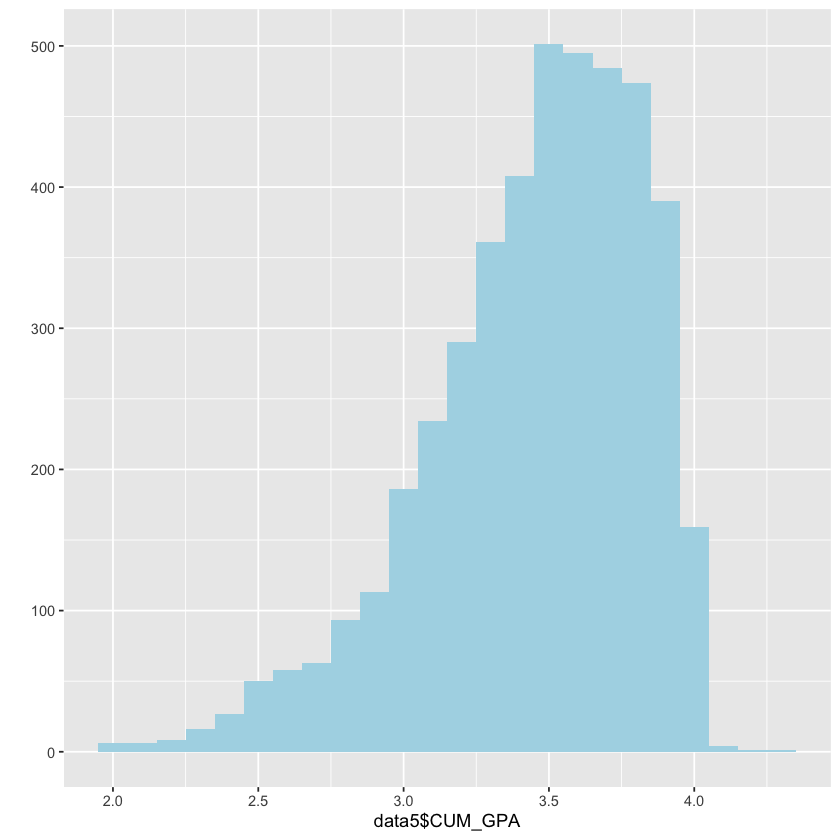

In [51]:
#save the histogram
#pdf(file="gpa_histogram.pdf")
qplot(data5$CUM_GPA,
      geom="histogram", 
      binwidth = 0.1,fill=I("lightblue"))
#dev.off()